<a href="https://colab.research.google.com/github/innovateDotAI/ReadyToUseModels/blob/main/2_EWS_synthetic_dataDemo_BN_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rough Work

Dry run situation handling.
For this early warning system needs to develop.
Need to develop BN with continuous data.
Static model 

## Work Package Plan:
Stpes to follow in development of BN network.
Sprint start: 10-sep-22 

	1. Create Validation and accuracy measurement of model
	2. Update profile to share
	3. Create synthetic dataset 
	4. Create interactive interface
	5. Design network with multiple RV's
	6. Design the queries( all 3 kind)
	Create Presentation slide
	Create private python library which customer can use at their end. 
	
	A. Complete the Literature survey of Early warning system
sprint End: 21-Sep-22
	


**note**: Try to learn the thoretical part at that time and update mind-map and this notebook as appropriate. Don't try to learn all theories and mathamatical proffs before making the Model.

## Refrence URL or Literature survey of Early warning system

Transforming Numerical to Categorical: Entropy-based Binning 
From <https://www.youtube.com/watch?v=gmiINKkYcF8>

Pandas: How to Create New DataFrame from Existing DataFrame : <https://www.statology.org/pandas-create-dataframe-from-existing-dataframe/>

#Abstract





#Introduction

We are developing demo system which will generate warning before failure and it should give sufficient lead time for maintenance.

## List of algorithm used in this notebook

#Literature Survey

Write about early warning system desing concept

**Paper/Book chapter Name:**

**Paper Number for refrence in this notebook:**

**Year of Publish:**

**Journal/Book name:**

**Author:**

**Paper summary:**

Template for paper/Book refrence:

**Paper/Book chapter Name:**

**Paper Number for refrence in this notebook:**

**Year of Publish:**

**Journal/Book name:**

**Author:**

**Paper summary:**



---



**Topic**: Descretization methods:

**Paper/Chapter Name:** Chapter-2

**Paper Number for refrence in this notebook:** [1]

**Year of Publish:** 2006

**Journal/Book name:**“Introduction to Data Mining” Pearson Education

**Author:** Tan P. N., Steinbach M & Kumar V.

**Paper summary:**
Before getting into details of descretization methods, we need to understand the various forms of data. Data can exist in various froms like categorical, numerical. Within categorical, it can be nominal, ordinal. Within numerical, it can be interval and ratio.

The data can be distinguished based on number of values that data can take. Based on this we can say there is two type of data:

1. Discrete: When data has finite or contabialy infinite attribute then that kind of data is called discrete data. This can be categorical like emp ID. if number of employee is vary large then empID will become countably infinite. Binay attribute is special kind of discrite data.

2. Continous: If the value of data can be any real number then that kind of data is called continous data. E.g  attributes such as temperature, height, or weight.They are typically represented as floating-point variables. Practically, real values can only be measured and represented with limited precision.

There are various data mining and machine learning algorithm which finds pattern in discretized data. For these algorithms we need to transform continous data into discretized from. Baysean network works well with discretized data. so we need to transfrom our contious data into discretized data. Discretization normally applied to those attribite which is part of algorithms. Discretization is usually not dependent on algorithm which we choose. Discretization perfromed in two steps:

1. Choose number of categories in which given continous data need segrigate.

2. How to map the continous values to these categories.

We first sort the continous values, then define the intervals and map the data into intervals accordingly. Discretization can be supervised( when class infomration used) or unsupervised( when class information not used).
For Unsupervised method we can use **equal width** approach or **equal frequency**. We can also use K-means algorithms for discretization too. Sometime visual inspection of data gives good understanding about discretization.If we measure the performance of a discretization technique by the extent to which different objects in different groups are assigned the same categorical value, then K-means performs best, followed by equal frequency, and finally, equal width.

Our aim of discretization is to maximize the purity of intervals that we choose for discretization. In absense of no knowledge about class label we can mix the data of two diffrent class into same interval. This is highly possible in unsupervised discretization methods. So by using class labels we can produce better discretization which is also called ***supervised discretization*** techniques. Usually entory based method is effective in supervised discretization. 

sklearn provided unsurvised discretization algorithm(sklearn.preprocessing.KBinsDiscretizer) for ::

a) Uniformly-sized bins,

b) Bins with "equal" numbers of samples inside (as much as possible)

c) Bins based on K-means clustering

But no algorithm for supervised method found which can be directly used to discretize the given dataset but we can use sklearn DecisionTreeClassifier(max_leaf_nodes=5, random_state=0,criterion='entropy') which will discretize the given dataset. We need to customize this algoirthm as per discretization requirement by setting various valusing of diffrent parameter. The details of parameter values can be found in code details related to discretization.


Write details on bayesian network, CPD's and queries

**Paper/Book chapter Name:**

**Paper Number for refrence in this notebook:**

**Year of Publish:**

**Journal/Book name:**

**Author:**

**Paper summary:**

#Problem Statement

Develop early warning system using machine failure data

#Objective of the paper

Basaed on problem statements what all areas we are addressing though this notebook. What gapes remains after developing this notebook

# Load the Library used for this demo

In [ ]:
# pgmpy will be uised for bayesian network based estimation
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 2.1 MB/s 


In [ ]:
# General libraries:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
# Tensarflow library
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras import regularizers
#from google.colab import drive
np.set_printoptions(precision=3, suppress=True)
# sklearn libraries: Supervised Descretization of the data using entory method
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# pgmpy libraries:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(precision=2)
import time

#The Data details

#Load the Data


Data has been generated to check the model by slef induced complexity.

## FM  for Data Loading

In [ ]:
def nFeatureSetData(n,seed,SIZE,boundray,visulaization):
  '''
  This function module generates n featured dataset with class label.
  The boundray between inlier and outlier is based on uppler limit of dataset

  =============================================================
  Input:
  n = no. of feature in dataset
  seed = gives magnitude to all columns diffrently. this should be more then 100
  SIZE = number of row's in the dataset
  boundray = define the how much class imbalnced between inlier and outlier.
  visulaization: This display the data in graphical formate for  better understanding.
  =============================================================
  Output:
  Dataset 
  '''
  feature = np.random.rand(SIZE,n)*seed
  max_feature = np.amax(feature,axis=0)

  mean = np.random.randint(50, high=seed, size=n, dtype=int)
  #print(mean)
  feature = np.random.uniform(0.8,1.20,SIZE*n).reshape(SIZE,n)*mean
  max_feature = np.amax(feature,axis=0)
  b = max_feature*boundray
  label = np.zeros((SIZE,1))
  dS = np.concatenate((feature,label), axis=1) # Status column added with 0 values
  # Update the lable field based on the condition
  for i in range(len(b)):
    dS[:,-1] = np.where(dS[:,i] < b[i], dS[:,-1], 1+dS[:,-1])
  dS[:,-1] = np.where(dS[:,-1] < 1, dS[:,-1],1)
  # Count the no. of zeros and ones in the matrix
  unique, counts = np.unique(dS[:,-1], return_counts=True)
  print("Class balance situation:\n")
  print("=====================================================\n")
  for i in range(len(unique)):
    print("Class=",unique[i],"==>Count=",counts[i])

  # Convert numpy dataset to pandas
  df = pd.DataFrame(data = dS,columns=['X' + str(i + 1) 
                          for i in range(dS.shape[1])])
  df = df.rename(columns={df.columns.to_list()[-1]: "Y"})
  df1 = df.copy()
  if visulaization == True:
    print("=====================================================\n")
    print("\nPreview of dataset:\n",df.head())
    print("=====================================================\n")
    #print("\n Data Shape in histogram:\n",df.hist(bins=30))
    df['index1'] = df.index
    for col in df.columns[0:-2]:
      print("\n Scatter diagram for:",col)
      df.plot.scatter(y = col,x = 'index1',figsize=(10,5),c = ['r' if x else 'g' for x in (df.Y == 1)],s = [100 if x else 10 for x in (df.Y == 1)])
    print("\n Data Shape in histogram:\n",df.hist(bins=30))
  return df1

#Experiments

Experiment has been designed in multipal stage. 

**Stage:1**: Experiment will start with single dimension data with only one side boundray. OSF with L varient. In this failure will happen when the product of tool wear and torque exceeds 11,000 minNm for the L product variant

**Stage:2** : Single dimension data with boundray both side

**Stage:3**: Two dimension data 

**Stage:4** Multiple dimension data 


## Prepare Test and Training data

In [ ]:
def Train_test_data(df,testSize,visulaize):
  '''
  # splitting dataframe by row index
  This FM generate test set of random data 
  Input:
  df = dataFame from which test data will be generated
  testSize = In fraction how much test data to be generated

  Output: Two pandas_object: df_1,df_2
  '''
  trnCount = int(len(data)*testSize)
  tstCount = int(len(data)*(1-testSize))
  df_1 = df.iloc[:trnCount,:]
  df_2 = df.iloc[trnCount:,:]
  df_2 = df_2.reset_index(drop=True)
  if visulaize == True:
    print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))
  return df_1, df_2

##Function Module Generation

### FM for discretization

In [ ]:
def dicrizData(trnData,tstData,label,visulaize,bucket,method):
  '''
  # Data discretization using entropy based binning method for each column seperatly
  Input:
  trnData:Training dataset used to build the decesion tree,
  tstData: Test dataset used to lable to test dataset based on training dataset model,
  label: Class lable column name,
  v: Data Visulation True or False,
  bucket: Number of bucket in which continous data needs to be divided,
  method : Division method : Entropy or Gini

  Output: Two set of discretized data. Training and Test dataframe
  '''
  trnClass_df = trnData[[label]].copy()
  tstClass_df = tstData[[label]].copy()

  trnFeature_df = trnData.drop([label],axis=1)
  tstFeature_df = tstData.drop([label],axis=1)
  #class_df = data[[data.columns[-1]]].copy()
  trnClass_df['index1']= trnClass_df.index
  tstClass_df['index1']= tstClass_df.index

  #class_df['index1'] = class_df.index
  trnDisc_df = trnClass_df.copy()
  tstDisc_df = tstClass_df.copy()
  for col in trnFeature_df: # Leaving the class column
    # Model generation for Data Discretization
    trnfeature_df = trnFeature_df[[col]].copy() # featue set column
    clf = disctizModel(bucket,method,trnfeature_df,trnClass_df,v)
    # Data discretization for Training data:
    trndisc = dataLable(clf,trnfeature_df,trnClass_df)
    trndisc['index1'] = trndisc.index
    # Data discretization for Test data:
    tstfeature_df = tstFeature_df[[col]].copy()
    tstdisc = dataLable(clf,tstfeature_df,tstClass_df)
    tstdisc['index1'] = tstdisc.index    
    #print("discCount",disc.count())
    trnDisc_df = pd.merge(trndisc,trnDisc_df, on='index1', how='outer')
    tstDisc_df = pd.merge(tstdisc,tstDisc_df, on='index1', how='outer')
  trndscrtz_df= trnDisc_df.drop(['index1'], axis=1)
  tstdscrtz_df= tstDisc_df.drop(['index1'], axis=1)
  if visulaize == True:
    print("Training Discretized Data:\n",trndscrtz_df.head())
    print("Test Discretized Data:\n",tstdscrtz_df.head())
  return trndscrtz_df , tstdscrtz_df

# Discretization model generation
def disctizModel(label,method,X,y,visulaize):
  """
  This FM rerturn the discretization model
  FM needs three input:
  1. label: Number of label in which data needs to divide
  2. method: Class purity function. Possible value: "gini" , "entropy"
  3. X,y : Pandas contious dataset. X is multidimention feature set and y is class labels.
  4. Visulaize will show the decesion tree Possible value: True or False
  """
  # Convert pandas to numpy. Then we can use this in skelarn algorithms
  X_np = X.to_numpy()
  y_np = y.to_numpy()
  # handle the shape of X for single and multidimention case
  try:
    X_np.shape[1]
  except:
    X_np = X_np.reshape(len(X_np),1)
  model = DecisionTreeClassifier(max_leaf_nodes=label, random_state=0,criterion=method)
  model.fit(X_np, y_np[:,0]) # Reshape the single dataset to fit into model

  if visulaize == True:
    tree.plot_tree(model,node_ids=True) # Display the tree with tree id , this helps into discretize the dataset.
    plt.show()
  return model

def dataLable(model,X,y):
  """
  FM needs three input:
  1. label: Number of label in which data needs to divide
  2. method: Class purity function. Possible value: "gini" , "entropy"
  3. X,y : Pandas contious dataset. X is multidimention feature set and y is class labels.
  FM output:
  Returns pandas with discretization of continous data.
  """
  col_name = X.columns.to_list()
  #col_name.append('Y')
  # Convert pandas to numpy. Then we can use this in skelarn algorithms
  X_np = X.to_numpy()
  y_np = y.to_numpy()
  # Handle the shape of X for single and multidimention case

  try:
    X_np.shape[1]
  except:
    X_np = X_np.reshape(len(X_np),1)

  X_discret = model.apply(X_np)
    # handle the shape of X_discret for single and multidimention case
  try:
    X_discret.shape[1]
  except:
    X_discret = X_discret.reshape(len(X_discret),1) 

  #discret = np.append(X_discret, y_np.reshape(len(y_np),1), axis=1) # Append two array into single array
 
  df = pd.DataFrame(X_discret) # Convery np into pandas
  df.columns = col_name
 
  return df

### FM for Bayesian model ( Pending)
--will be developed when many variable interation will happen

In [ ]:
# Structure learning ( Pending for mutivarient)
def strBayesian():
  pass
# Bayesian model generation
def modelGeneration():
  pass
# Query Interface developmen on bayesian model
def queryBayesian():
  pass


### FM for Model Accuracy measurement

In [ ]:
def model_accuracy(df,b):
  '''
  # Accuracy calculation
  '''
  l2 = df.to_dict('records')
  y = list(df_y.columns)
  l3=list()
  for i in l2:
    if i[y[1]] >=b:
      i['label'] =1
    else:
      i['label'] = 0
    l3.append(i)
  df_confusion = pd.DataFrame(l3)
  x = df_confusion.to_numpy()
  y_true = x[:, 0]
  y_pred = x[:,2]
  import matplotlib.pyplot as plt
  import numpy
  from sklearn import metrics

  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

  cm_display.plot()
  plt.show()
  return y_true,y_pred

### FM for Model Warning visualization

In [ ]:
def WarningVisulaize(YT,YP):
  Z = np.concatenate((YT.reshape(len(YT),1),YP.reshape(len(YP),1)), axis=1)
  # creating the dataframe
  df_Z = pd.DataFrame(data = Z,  columns = ['y_true','y_pred'])
  df_Z_war = df_Z[(df_Z['y_true']==1)|(df_Z['y_pred']==1)]
  #Z_df = df_Z_war.copy()
  Z_df = df_Z_war.reset_index(drop=True)
  Z_df['index1'] = Z_df.index
  X = Z_df['index1'].to_numpy()
  yT = Z_df['y_true'].to_numpy()
  yP = Z_df['y_pred'].to_numpy()
  # Plotting both the curves simultaneously
  plt.scatter(X, yT, color='r',s = 100, label='Actual Warning')
  plt.scatter(X, yP, color='g', label='Model Generated Warning')
  # Naming the x-axis, y-axis and the whole graph
  plt.xlabel("Time Step")
  plt.ylabel("Warning level")
  plt.title("Actual Warning Vs Model Generated Warning")

  # Adding legend, which helps us recognize the curve according to it's color
  plt.legend()
  # To load the display window
  plt.show()

# Main Program for algorithm==> Static bayesian network

Class balance situation:


Class= 0.0 ==>Count= 9913
Class= 1.0 ==>Count= 87


Preview of dataset:
       X1     X2     X3    Y
0 338.50 219.27 195.98 0.00
1 299.89 162.89 200.21 0.00
2 342.75 187.20 167.42 0.00
3 338.64 157.64 222.81 0.00
4 341.01 195.83 161.64 0.00


 Scatter diagram for: X1

 Scatter diagram for: X2

 Scatter diagram for: X3

 Data Shape in histogram:
 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93d1414510>
[9576]
Y
0.00    9912
1.00      88
dtype: int64
Shape of new dataframes - (9000, 4) , (1000, 4)


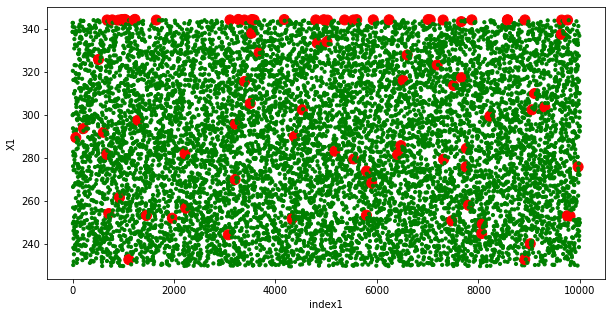

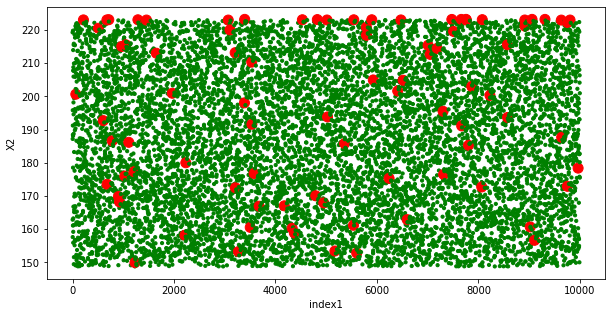

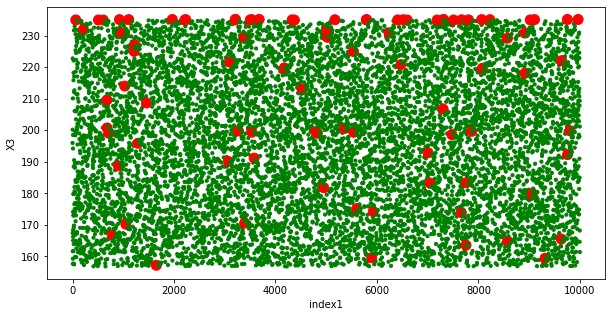

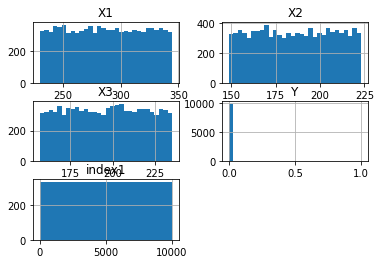

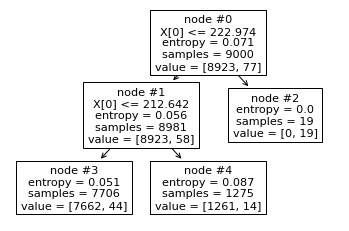

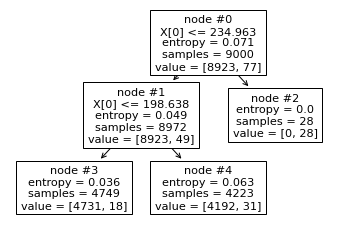

Training Discretized Data:
    X3  X2  X1    Y
0   3   4   4 0.00
1   4   3   4 0.00
2   3   3   4 0.00
3   4   3   4 0.00
4   3   3   4 0.00
Test Discretized Data:
    X3  X2  X1    Y
0   3   3   4 0.00
1   3   3   4 0.00
2   3   3   4 0.00
3   3   3   4 0.00
4   3   3   4 0.00


/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

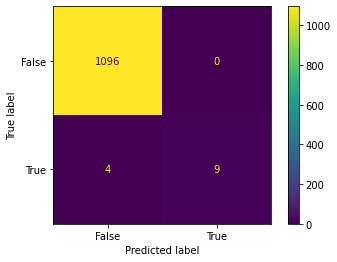

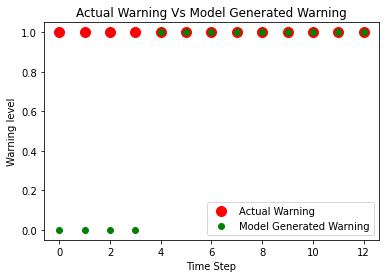

In [ ]:
# Generate the dataset and understand the distribution:
# HyperParameter Input:
bucket = 3 # No. of labels in discretized data
method = 'entropy' # Option {“gini”, “entropy”} usef or class impurity reduction function
b = 0.5 # Boundray line for class label in probability
v = True
trnSize = 0.9
label = 'Y'
feature = 3 # No. of Random Variable
magnitude = 300
rows = 10000 
boundray = 0.999 # In actual dataset boundray for outlier
data = nFeatureSetData(feature,magnitude,rows,boundray,v)
# Introduce Random error in the dataset
low = rows*trnSize
indx = np.random.randint(low, high=rows-1, size=1, dtype=int)
print(indx)
for ind in indx:
  data.loc[ind,"Y"]=1
#data.loc[:, 'Y'] = np.where(data.index.isin(indx), 1, 0)
print(data.groupby(['Y']).size())

# #Save file to grive
# import os.path
# from os import path
# from google.colab import drive
# drive.mount('/content/drive')
# floc = '/content/gdrive/MyDrive/EWS_data2/'
# fname = 'data.csv'
# if path.exists(floc) == False:
#   os.mkdir(floc)
# os.chdir(floc)
# data.to_csv(floc+fname)


# Generate Train and Test dataset from given dataset
trn_df, tst_df = Train_test_data(data,trnSize,v)
## Discretize the data
trnDis_df , tstDis_df = dicrizData(trn_df, tst_df,label,v,bucket,method)
# Generate Bayesian netowrk for this  RV's
# Manual decided structure
BNmodel = BayesianModel([('X1', 'Y'),('X2', 'Y'),('X3', 'Y')])
BNmodel.fit(trnDis_df) # Generates cpd's and attach to the model
# print(BNmodel.get_cpds('Y'))
# print(BNmodel.get_cpds('X1'))
# print(BNmodel.get_cpds('X2'))
#Initializing the VariableElimination class
from pgmpy.inference import VariableElimination
infer = VariableElimination(BNmodel)
#Doing Inference using hard evidence
# Computing the probabilities of test data
recard = tstDis_df.drop_duplicates()
#recard = recard.drop(['Y'], axis=1)
rdict = recard.to_dict('records')
l1 = list()
for i in rdict:
  j = i.copy()
  j.popitem()
  v1 = infer.query(variables=["Y"], evidence=j).values[1]
  i['Prob'] = v1
  l1.append(i)
#print(l1)
tstProb_df = pd.DataFrame(l1)
tstDisProb_df = pd.merge(tstDis_df, tstProb_df, on=['X3', 'X2', 'X1'], suffixes=(None, '_r'))
# Actual class value Vs Predicted class value
df_y = tstDisProb_df[['Y', 'Prob']]
# Model Accuracy
# # Actual class value Vs Predicted class value
YT , YP = model_accuracy(df_y,b)
# Warning visualization graph generation
WarningVisulaize(YT,YP)

In [ ]:
# Prediction on fix dataset
# HyperParameter Input:
bucket = 3 # No. of labels in discretized data
method = 'entropy' # Option {“gini”, “entropy”} usef or class impurity reduction function
b = 0.5 # Boundray line for class label in probability
v = False
trnSize = 0.9
label = 'Y'
feature = 3 # No. of Random Variable
magnitude = 300
rows = 10000 
boundray = 0.999 # In actual dataset boundray for outlier

#Load file from grive
# #Save file to grive
# import os.path
# from os import path
# from google.colab import drive
# drive.mount('/content/drive')
floc = '/content/gdrive/MyDrive/EWS_data2/'
fname = 'data.csv'
if path.exists(floc) == False:
  os.chdir(floc)
df_bonus = pd.read_csv('/content/gdrive/MyDrive/EWS_data2/data.csv')


# Generate Train and Test dataset from given dataset
trn_df, tst_df = Train_test_data(data,trnSize,v)
## Discretize the data
trnDis_df , tstDis_df = dicrizData(trn_df, tst_df,label,v,bucket,method)
# Generate Bayesian netowrk for this  RV's
# Manual decided structure
BNmodel = BayesianModel([('X1', 'Y'),('X2', 'Y'),('X3', 'Y')])
BNmodel.fit(trnDis_df) # Generates cpd's and attach to the model
# print(BNmodel.get_cpds('Y'))
# print(BNmodel.get_cpds('X1'))
# print(BNmodel.get_cpds('X2'))
#Initializing the VariableElimination class
from pgmpy.inference import VariableElimination
infer = VariableElimination(BNmodel)
#Doing Inference using hard evidence
# Computing the probabilities of test data
recard = tstDis_df.drop_duplicates()
#recard = recard.drop(['Y'], axis=1)
rdict = recard.to_dict('records')
l1 = list()
for i in rdict:
  j = i.copy()
  j.popitem()
  v1 = infer.query(variables=["Y"], evidence=j).values[1]
  i['Prob'] = v1
  l1.append(i)
#print(l1)
tstProb_df = pd.DataFrame(l1)
tstDisProb_df = pd.merge(tstDis_df, tstProb_df, on=['X3', 'X2', 'X1'], suffixes=(None, '_r'))
# Actual class value Vs Predicted class value
df_y = tstDisProb_df[['Y', 'Prob']]
# Model Accuracy
# # Actual class value Vs Predicted class value
YT , YP = model_accuracy(df_y,b)
# Warning visualization graph generation
WarningVisulaize(YT,YP)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


OSError: ignored

#Key Challenges 

It is assumed that probability distribution of training and test dataset will be from same probability distribution function. If new datset is deviating from existing probability distribution function then we need to retrain the model with new set of training dataset so that the test and training dataset have same probability distribution function.

#Potential Risk

#Future Work

#References